In [2]:
import pandas as pd

df = pd.read_csv('fraud_detection_dataset.csv')
print(df.head())

   transaction_amount  user_age  account_age_days  num_transactions_last_24h  \
0               56.31        68              1204                          0   
1              361.21        57              2564                          1   
2              158.01        24               175                          3   
3              109.55        49              2811                          3   
4               20.35        65              1976                          0   

   is_foreign_transaction  is_high_risk_merchant device_type  card_present  \
0                       0                      1     desktop             1   
1                       0                      0      mobile             0   
2                       0                      0      mobile             0   
3                       0                      0      mobile             0   
4                       0                      0      mobile             1   

   fraud  
0      0  
1      0  
2      0  
3     

In [3]:
print(df.isnull().sum())

transaction_amount           0
user_age                     0
account_age_days             0
num_transactions_last_24h    0
is_foreign_transaction       0
is_high_risk_merchant        0
device_type                  0
card_present                 0
fraud                        0
dtype: int64


In [4]:
df['fraud'].value_counts()

fraud
0    4899
1     101
Name: count, dtype: int64

In [ ]:
fraud_counts = df['fraud'].value_counts()
print('Not fraud:',fraud_counts[0])
print('fraud:',fraud_counts[1])  
#there is an obvious class imbalance. it would be logical to prioritize recall over accuracy

Not fraud: 4899
fraud: 101


In [6]:
df['fraud'].value_counts(normalize=True)*100  #used to get the percentage spread

fraud
0    97.98
1     2.02
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

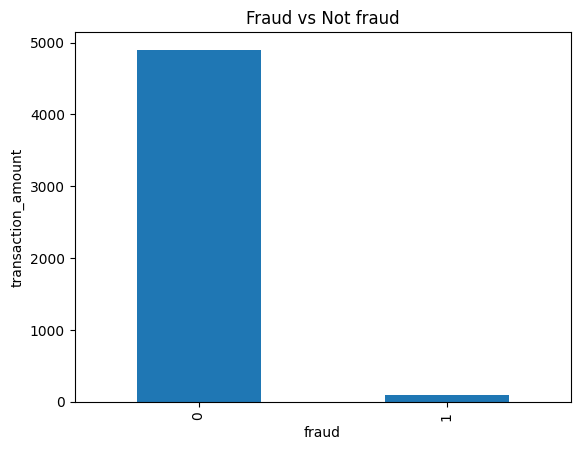

In [7]:
import matplotlib.pyplot as plt 

df['fraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Not fraud')
plt.xlabel('fraud')
plt.ylabel('transaction_amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

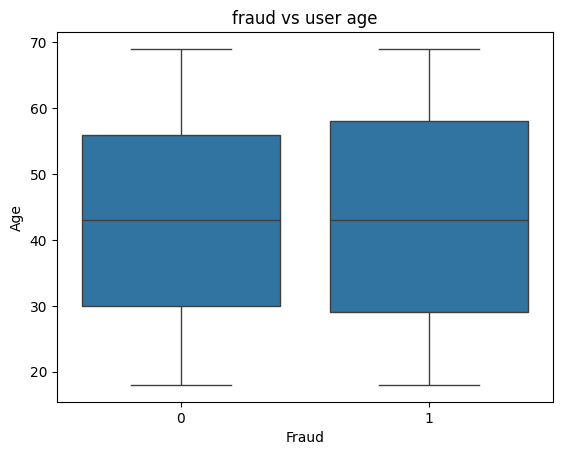

In [10]:
import seaborn as sns
sns.boxplot(x='fraud', y='user_age', data=df)
plt.title('fraud vs user age')
plt.xlabel('Fraud')
plt.ylabel('Age')
plt.show

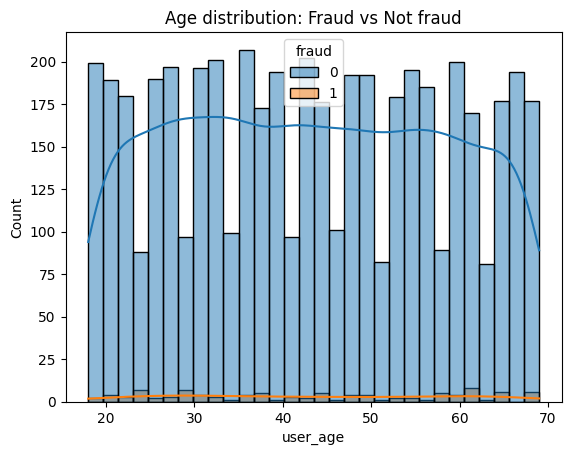

In [14]:
sns.histplot(data=df, x='user_age', hue='fraud', bins=30, kde=True)
plt.title('Age distribution: Fraud vs Not fraud')

plt.show()

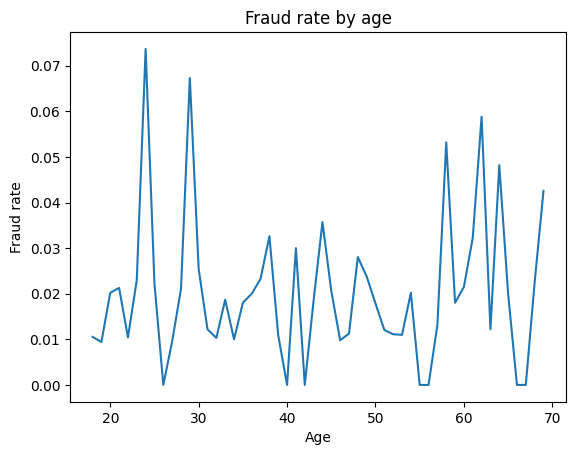

In [15]:
fraud_by_age = df.groupby('user_age')['fraud'].mean()

fraud_by_age.plot()
plt.title('Fraud rate by age')
plt.xlabel('Age')
plt.ylabel('Fraud rate')
plt.show()